## Importing Libraries and setting-up environment

In [1]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical computing
import matplotlib.pyplot as plt #Data Visualzation
import seaborn as sns #Data Visualzation
import time #Various time-related functions

In [2]:
#Settings for appropriate display  

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Ignoring all warning ⚠ messages thrown

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [4]:
import pandas_datareader as pdr #Remote data access for pandas
from datetime import date

df = pdr.DataReader('TSLA', data_source='yahoo', start='2010-06-28', end = "2019-12-31")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


## Correcting the Dataset

In [5]:
df = df["Close"]
df = pd.DataFrame(df)
df.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


## Visualizing the Data

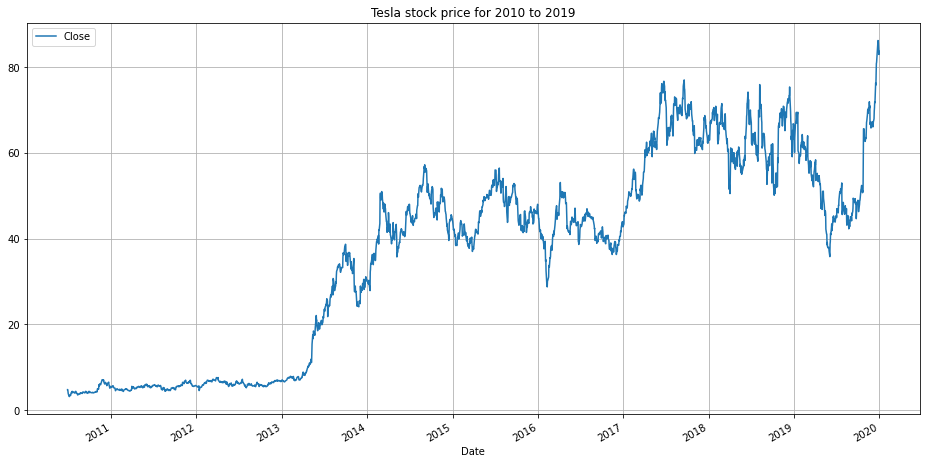

In [6]:
df.plot(figsize=(16,8), title = "Tesla stock price for 2010 to 2019", grid = True)

## Calculations

In [7]:
#Simple Moving Average

df['SMA_1'] = df.Close.rolling(7, min_periods=1).mean() #Period of 1 week
df['SMA_2'] = df.Close.rolling(14, min_periods=1).mean() #Period of 2 weeks
df['SMA_4'] = df.Close.rolling(28, min_periods=1).mean() #Period of 4 weeks

In [8]:
#Cumulative Moving Average

df['CMA'] = df.Close.expanding().mean()

In [9]:
#Exponential Moving Average

df['EMA_0.1'] = df.Close.ewm(alpha=0.1, adjust=False).mean() #Smoothing factor - 0.1
df['EMA_0.3'] = df.Close.ewm(alpha=0.3, adjust=False).mean() #Smoothing factor - 0.3

In [10]:
df[1640:] #Data from 2017 to 2019

,Close,SMA_1,SMA_2,SMA_4,CMA,EMA_0.1,EMA_0.3
Date,,,,,,,
2017-01-03,43.397999,43.040571,41.750714,39.890357,25.742667,41.314059,42.969709
2017-01-04,45.397999,43.570285,42.162714,40.146214,25.754637,41.722453,43.698196
2017-01-05,45.349998,43.953428,42.563571,40.386286,25.766564,42.085208,44.193737
2017-01-06,45.801998,44.224285,43.012571,40.617428,25.778751,42.456887,44.676215
2017-01-09,46.256001,44.553999,43.423857,40.868571,25.791199,42.836798,45.150151
...,...,...,...,...,...,...,...
2019-12-24,85.050003,80.221142,74.759142,71.534643,36.550212,74.830939,81.328039
2019-12-26,86.188004,81.633714,76.195857,72.117428,36.570972,75.966646,82.786029
2019-12-27,86.075996,83.102000,77.545714,72.676071,36.591668,76.977581,83.773019


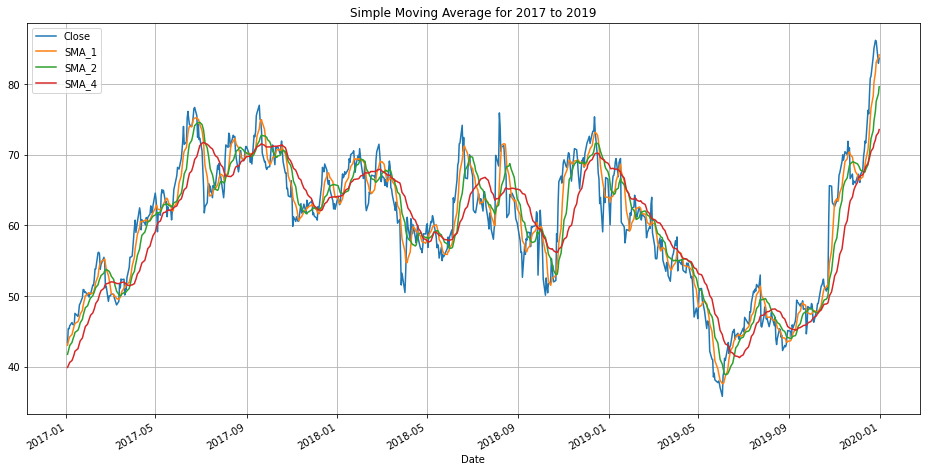

In [11]:
#Plotting Simple Moving Average for 2017 to 2019

df[1640:][['Close', 'SMA_1', 'SMA_2', 'SMA_4']].plot(figsize=(16,8), title = "Simple Moving Average for 2017 to 2019", grid = True)

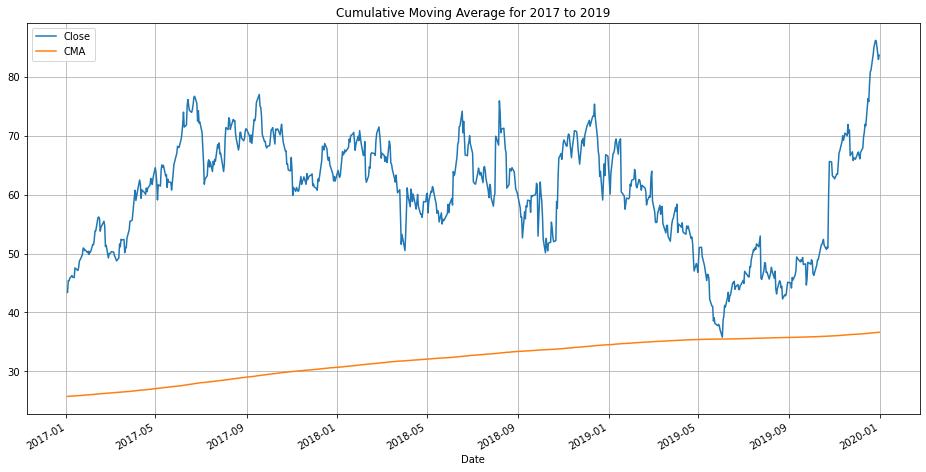

In [12]:
#Plotting Cumulative Moving Average for 2017 to 2019

df[1640:][['Close', 'CMA']].plot(figsize=(16,8), title = "Cumulative Moving Average for 2017 to 2019", grid = True)

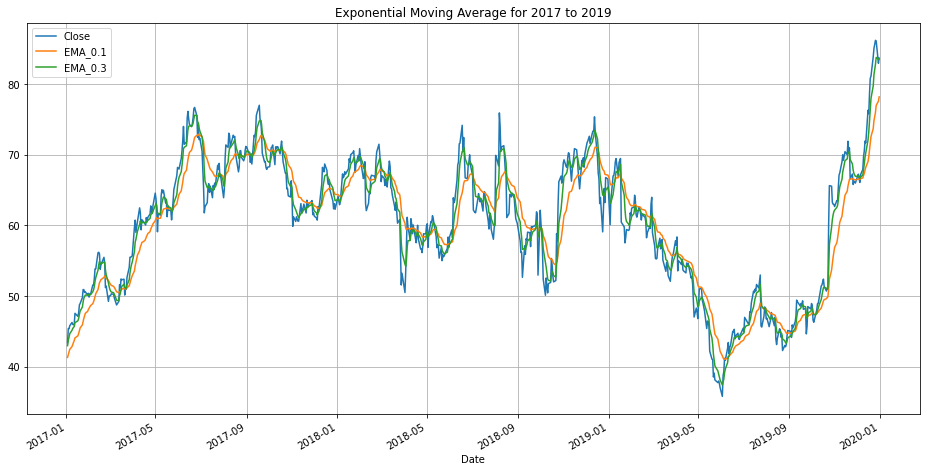

In [13]:
#Plotting Exponential Moving Average for 2017 to 2019

df[1640:][['Close', 'EMA_0.1', 'EMA_0.3']].plot(figsize=(16,8), title = "Exponential Moving Average for 2017 to 2019", grid = True)

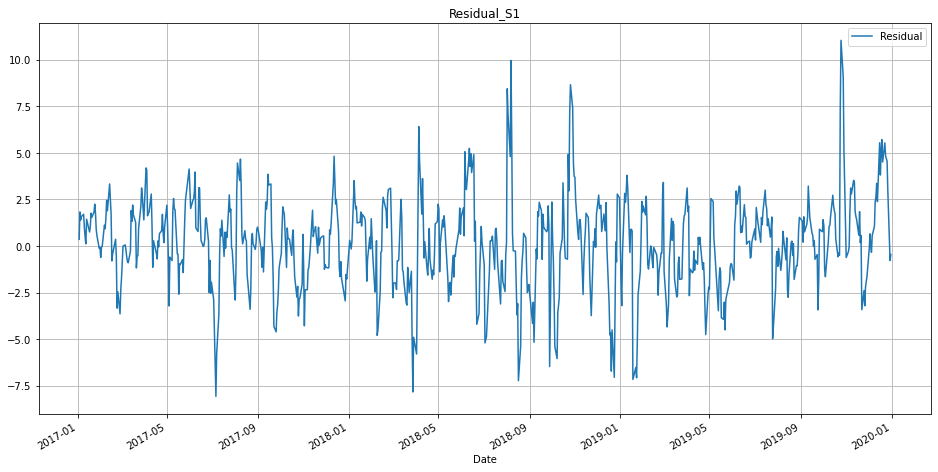

In [14]:
#Residual (Error) for SMA_1

res = df[1640:]['Close'] - df[1640:]['SMA_1']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S1', figsize=(16,8), grid = True)

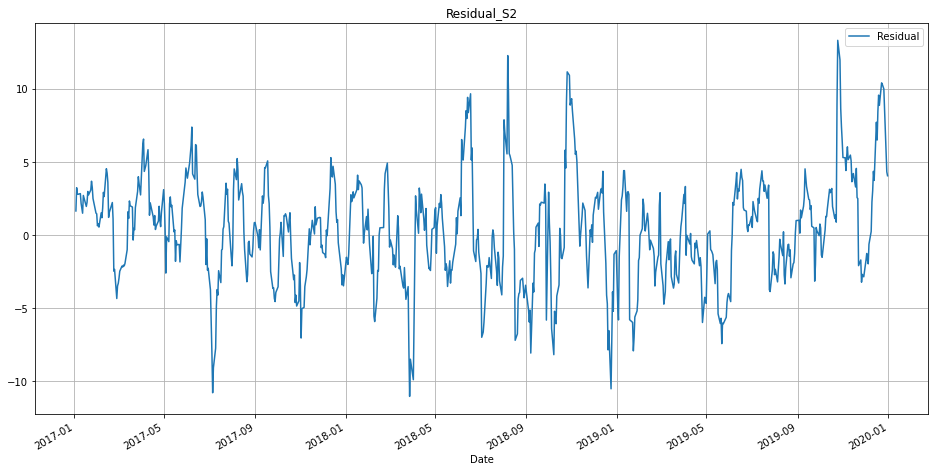

In [15]:
#Residual (Error) for SMA_2

res = df[1640:]['Close'] - df[1640:]['SMA_2']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S2', figsize=(16,8), grid = True)

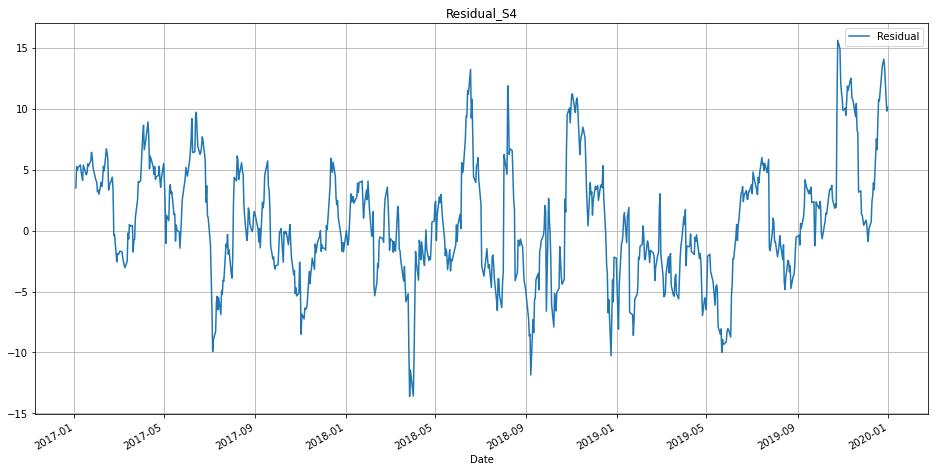

In [16]:
#Residual (Error) for SMA_4

res = df[1640:]['Close'] - df[1640:]['SMA_4']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_S4', figsize=(16,8), grid = True)

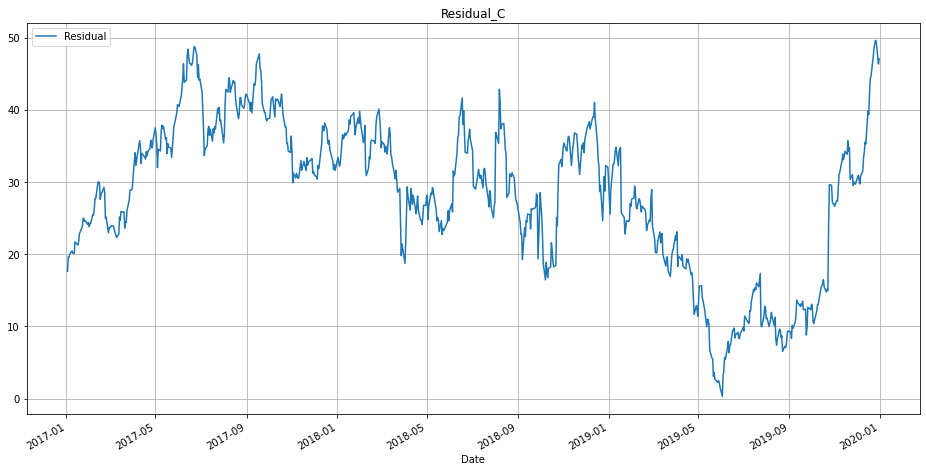

In [17]:
#Residual (Error) for CMA

res = df[1640:]['Close'] - df[1640:]['CMA']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_C', figsize=(16,8), grid = True)

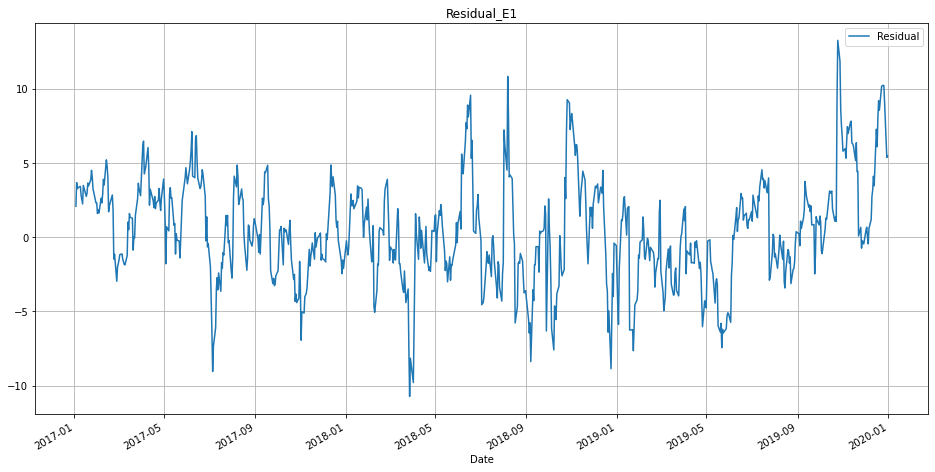

In [18]:
#Residual (Error) for EMA_0.1

res = df[1640:]['Close'] - df[1640:]['EMA_0.1']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_E1', figsize=(16,8), grid = True)

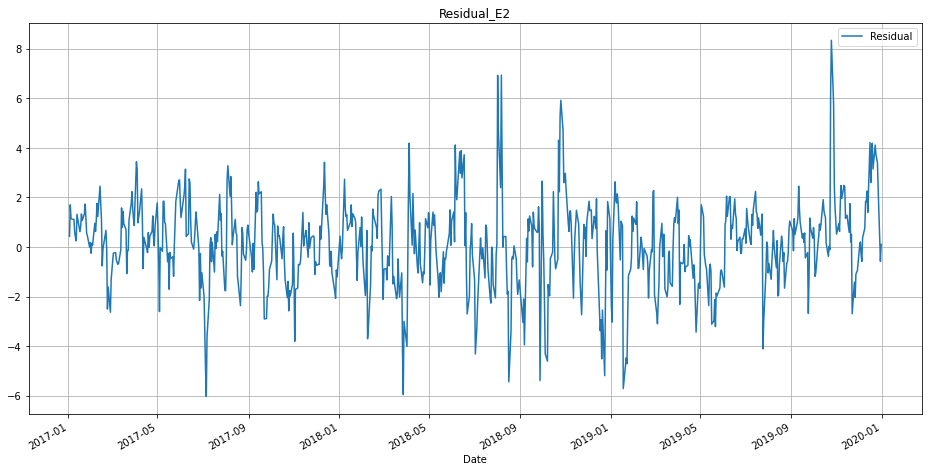

In [19]:
#Residual (Error) for EMA_0.3

res = df[1640:]['Close'] - df[1640:]['EMA_0.3']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_E2', figsize=(16,8), grid = True)

In [20]:
df["S1"] = df[1640:]['Close'] - df[1640:]['SMA_1']
df["S2"] = df[1640:]['Close'] - df[1640:]['SMA_2']
df["S4"] = df[1640:]['Close'] - df[1640:]['SMA_4']

df["C"] = df[1640:]['Close'] - df[1640:]['CMA']

df["E1"] = df[1640:]['Close'] - df[1640:]['EMA_0.1']
df["E3"] = df[1640:]['Close'] - df[1640:]['EMA_0.3']

In [21]:
df[1640:].mean()[7:]

S1     0.164430
S2     0.347339
S4     0.655267
C     28.225296
E1     0.442845
E3     0.126198
dtype: float64

In [22]:
#Root Mean Square Error(RMSE)

print("Root Mean Square Error for SMA_1:", round(np.sqrt(np.mean((df["S1"] ** 2))), 5))
print("Root Mean Square Error for SMA_2:", round(np.sqrt(np.mean((df["S2"] ** 2))), 5))
print("Root Mean Square Error for SMA_4:", round(np.sqrt(np.mean((df["S4"] ** 2))), 5))
#print("\n")
print("Root Mean Square Error for CMA:", round(np.sqrt(np.mean((df["C"] ** 2))), 5))
#print("\n")
print("Root Mean Square Error for EMA_1:", round(np.sqrt(np.mean((df["E1"] ** 2))), 5))
print("Root Mean Square Error for EMA_3:", round(np.sqrt(np.mean((df["E3"] ** 2))), 5))

Root Mean Square Error for SMA_1: 2.45631
Root Mean Square Error for SMA_2: 3.6314
Root Mean Square Error for SMA_4: 4.87866
Root Mean Square Error for CMA: 30.10806
Root Mean Square Error for EMA_1: 3.50824
Root Mean Square Error for EMA_3: 1.76201


#### Looks like EMA_3 has the best predictive power overall since it has the lowest RMSE value

In [23]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[1640:]['Close']
predictions = df[1640:]['SMA_1']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 6.033478621501269
Mean Absolute Error(MAE): 1.843703749505983
Root Mean Square Error (RMSE): 2.4563140315320573


In [24]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[1640:]['Close']
predictions = df[1640:]['SMA_2']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 13.187035630328788
Mean Absolute Error(MAE): 2.834191600587071
Root Mean Square Error (RMSE): 3.631395823967526


In [25]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[1640:]['Close']
predictions = df[1640:]['SMA_4']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 23.801351149107067
Mean Absolute Error(MAE): 3.862678472722015
Root Mean Square Error (RMSE): 4.878662844377245


In [26]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[1640:]['Close']
predictions = df[1640:]['CMA']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 906.4952758588948
Mean Absolute Error(MAE): 28.225295707121273
Root Mean Square Error (RMSE): 30.10805998165433


In [27]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[1640:]['Close']
predictions = df[1640:]['EMA_0.1']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 12.30773224620873
Mean Absolute Error(MAE): 2.735157060521192
Root Mean Square Error (RMSE): 3.5082377693378666


In [28]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[1640:]['Close']
predictions = df[1640:]['EMA_0.3']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 3.1046838148666582
Mean Absolute Error(MAE): 1.3192776975730425
Root Mean Square Error (RMSE): 1.7620112981665748


In [29]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = round(mean_absolute_percentage_error(y_test, predictions),5)
accuracy = round(100 - mape, 5)

print("Mean Absolute Percentage Error (MAPE): " + str(mape) + " %")
print("Hence Accuracy of Model is: " + str(accuracy) + " %")

Mean Absolute Percentage Error (MAPE): 2.20252 %
Hence Accuracy of Model is: 97.79748 %


## Using Best Model for 2020 Prediction

In [30]:
#Fetching data from IPO date to 21 Jan 2020

df = pdr.DataReader('TSLA', data_source='yahoo', start='2010-06-28', end = "2020-01-21")
df = df["Close"]
df = pd.DataFrame(df)
df.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


In [31]:
#Exponential Moving Average

df['EMA_0.3'] = df.Close.ewm(alpha=0.3, adjust=False).mean() #Smoothing factor - 0.3

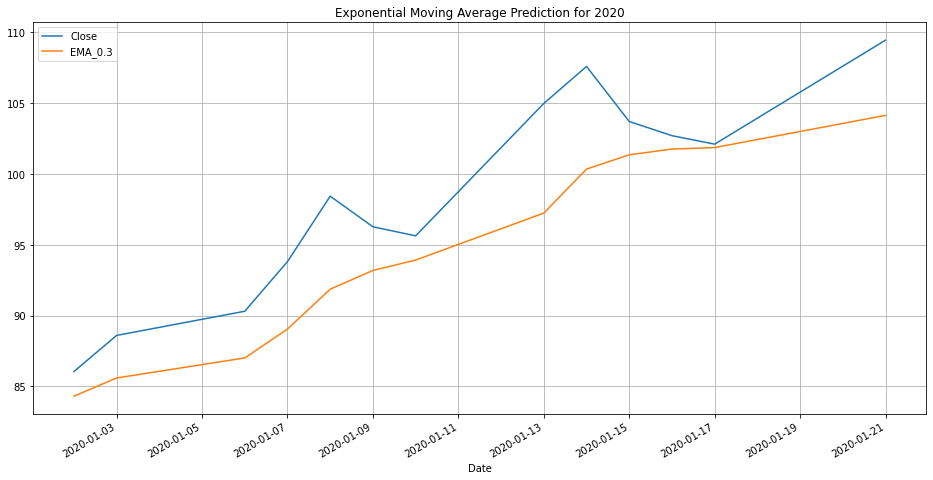

In [32]:
#Plotting Exponential Moving Average Prediction for 2020

df[2394:][['Close','EMA_0.3']].plot(figsize=(16,8), title = "Exponential Moving Average Prediction for 2020", grid = True)

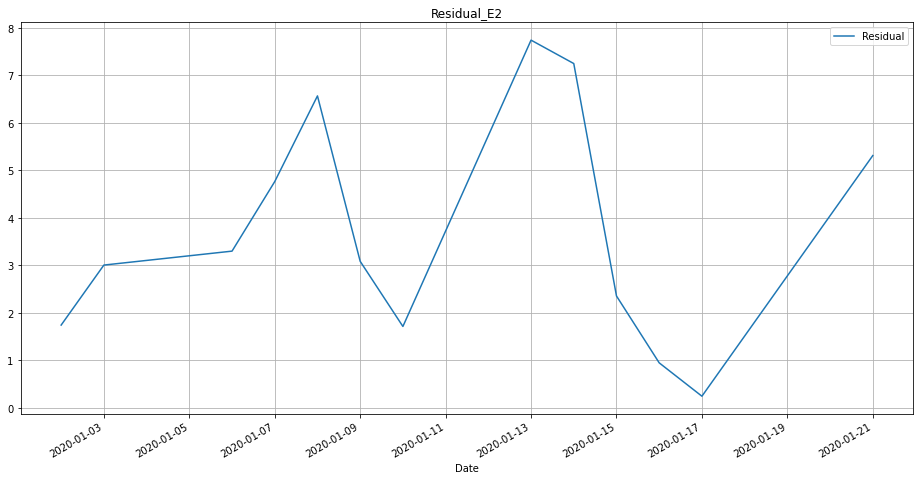

In [33]:
#Residual (Error) for EMA_0.3

res = df[2394:]['Close'] - df[2394:]['EMA_0.3']
res = pd.DataFrame(res)
res.rename(columns= {0: 'Residual'}, inplace = True)

res.plot(title = 'Residual_E2', figsize=(16,8), grid = True)

In [34]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[2394:]['Close']
predictions = df[2394:]['EMA_0.3']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Mean Square Error (MSE): 19.083658021185656
Mean Absolute Error(MAE): 3.6913141636623332
Root Mean Square Error (RMSE): 4.368484636711643


In [35]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = round(mean_absolute_percentage_error(y_test, predictions),5)
accuracy = round(100 - mape, 5)

print("Mean Absolute Percentage Error (MAPE): " + str(mape) + " %")
print("Hence Accuracy of Model is: " + str(accuracy) + " %")

Mean Absolute Percentage Error (MAPE): 3.70592 %
Hence Accuracy of Model is: 96.29408 %


Made by: Hari N. Khatavkar

Credit: https://towardsdatascience.com/moving-averages-in-python-16170e20f6c